The case study is from an open-source dataset from Kaggle. 

Link to the Kaggle project site:

https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?

### Load the  `Bank.csv`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import numpy as np
import pandas as pd
import keras

from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

from google.colab import drive
drive.mount('/content/drive')

Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
bank_df = pd.read_csv('/content/drive/My Drive/ClassNotes/RES-7Deep/Project-Deep Learning/bank.csv',index_col='RowNumber')

In [3]:
bank_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


##2. Drop the columns which are unique for all users like IDs


In [0]:
## Removing surname as onhot encoding will cause issues for each one of them
bank_df=bank_df.drop(['CustomerId','Surname'], axis=1)


##3. Distinguish the feature and target set.


In [7]:
bank_df.info()    ## now we have 2 columns that have Object type.
                  ## Geography,Gender are 2 categorical variables, we need to encode them to make them numerical.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [9]:
## before splitting Data set into test and train, let us label encode the Gender and Geography.
bank_df.Gender.unique()   

array(['Female', 'Male'], dtype=object)

In [10]:
bank_df.Gender=le.fit_transform(bank_df.Gender)
bank_df.Gender.unique()   

array([0, 1])

In [11]:
bank_df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
bank_df.Geography=le.fit_transform(bank_df.Geography)
bank_df.Geography.unique()

array([0, 2, 1])

In [13]:
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [0]:
X = np.array(bank_df.drop("Exited", axis=1))  ## defining X, Feature set

In [15]:
y = np.array(bank_df["Exited"])   ## defining y, target Varible
bank_df.Exited.unique()

array([1, 0])

In [16]:
y = keras.utils.to_categorical(y, num_classes=2)  #Encoding the output class label (One-Hot Encoding)
y.shape

(10000, 2)

##4. Divide the data set into training and test sets


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

##5.Normalie the Data

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Find dimensions of an image in the dataset

In [20]:
print("Dimension of train samples:",x_train.shape)
print("Dimension of test samples:",x_test.shape)
print("Dimension of train samples:",y_train.shape)
print("Dimension of test samples:",y_test.shape)

Dimension of train samples: (7000, 10)
Dimension of test samples: (3000, 10)
Dimension of train samples: (7000, 2)
Dimension of test samples: (3000, 2)


### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.utils import np_utils
import pickle

import warnings
warnings.filterwarnings('ignore')

### Build a model 



In [22]:
# Define model
model = Sequential()

model.add(keras.layers.Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 10))
# Normalize the data
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(output_dim = 10, init = 'uniform', activation = 'relu'))
model.add(keras.layers.Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
model.add(keras.layers.Dense(output_dim = 2, init = 'uniform', activation = 'softmax'))

# Loss and Optimizer
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 14        
Total params: 590
Trainable params: 550
Non-trainable params: 40
_________________________________________________________________


In [24]:
# Train the model
history=model.fit(x_train, y_train, batch_size = 25, nb_epoch = 100,validation_data=(x_test, y_test))




Train on 7000 samples, validate on 3000 samples
Epoch 1/100





7000/7000 [==============================] - 3s 407us/step - loss: 0.6299 - acc: 0.7936 - val_loss: 0.5788 - val_acc: 0.7983
Epoch 2/100
7000/7000 [==============================] - 2s 218us/step - loss: 0.5529 - acc: 0.7954 - val_loss: 0.5300 - val_acc: 0.7983
Epoch 3/100
7000/7000 [==============================] - 2s 215us/step - loss: 0.5220 - acc: 0.7954 - val_loss: 0.5115 - val_acc: 0.7983
Epoch 4/100
7000/7000 [==============================] - 2s 220us/step - loss: 0.5112 - acc: 0.7954 - val_loss: 0.5054 - val_acc: 0.7983
Epoch 5/100
7000/7000 [==============================] - 2s 222us/step - loss: 0.5078 - acc: 0.7954 - val_loss: 0.5034 - val_acc: 0.7983
Epoch 6/100
7000/7000 [==============================] - 2s 223us/step - loss: 0.5069 - acc: 0.7954 - val_loss: 0.5029 - val_acc: 0.7983
Epoch 7/100
7000/7000 [==============================] - 2s 215us/step - loss: 0.5068 - acc: 0.7954 - val_loss: 0.5028 - v

##7.Predict the results using 0.5 as a threshold

In [0]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)   

In [26]:
y_pred[0:5]

array([[False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False]])

In [0]:
y_pred = y_pred.astype('float32')

In [28]:
y_test.shape

(3000, 2)

##8.Print the Accuracy score and confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[2302   93]
 [ 318  287]]


In [0]:
#### Significance of the confusion matrix values are as below:

 #### Predicted -->       No	  |    Yes
 #### Actual: No	-->    2290	  |    105
 #### Actual: Yes	-->     329	  |    276

In [31]:
print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

86.3 % of testing data was classified correctly


In [32]:
score_train = model.evaluate(x_train, y_train,verbose=0)
print("Train Loss=",score_train[0],"; Accuracy=",score_train[1])
score = model.evaluate(x_test, y_test,verbose=0)
print("Test Loss=",score[0],"; Accuracy=",score[1])

Train Loss= 0.31032640876088824 ; Accuracy= 0.8714285714285714
Test Loss= 0.3400018909374873 ; Accuracy= 0.8629999998410542


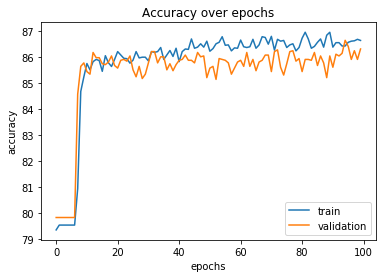

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.array(history.history['acc']) * 100)
plt.plot(np.array(history.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()